# Summary

What follows is a processing and analysis of Data recorded during a drug trial, conducted on mice, for several different drugs being tested as a treatment for tumnors.

We can clearly see that Capomulin outperforms almost all other drugs. However its important to note that, with the exception of Ramicane, Capomulin has a higher test population. Capomulin and Ramicane both have close to 50 or more test subjects within this dataset. Being a relatively smaller test population of under 200 mice for all other drugs its important to stress having almost 20-25% less test subjects in the other drug regimen populations could lead to skewed results.

With such a high difference in test populations Ramicane and Capomulin will be the two drugs worth comparing with the data given.

When looking at the box plots of Ramicane and Capomulin we can see that Ramicane shows slightly more promise as an alternative treatment. The median of the average tumor volumes are lower with a slightly larger inner two quartiles. Ramicane is not dominating Capomulin persay but does show promise and should be used for further studies. 

The final scatter plot that was asked for does show a clear correlations between mouse bodyweight and Tumor Volume. However this could easily be attributed to larger mice being able to have larger tumors compared to smaller mice as to be expected. 

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on='Mouse ID',how='right')

# Display the data table for preview

combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [64]:
#check the number of mice
len(combined_data['Mouse ID'].unique())

249

In [65]:
#find IDs that need dropped 
combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

array(['g989'], dtype=object)

In [66]:
#create dataframe with bad IDs
bad_data = combined_data[combined_data['Mouse ID'] == 'g989']
bad_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [67]:
#remove data and display data
clean_data = combined_data[combined_data['Mouse ID'] != 'g989']
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [68]:
#check data is actually removed
len(clean_data['Mouse ID'].unique())

248

In [69]:
meanTumor = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medianTumor = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
varianceTumor = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standardDevTumor = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
errorTumor = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summaryData = pd.DataFrame({'Mean Tumor Volume':meanTumor, 'Median Tumor Volume':medianTumor, 'Tumor Volume Variance':varianceTumor,
                           'Tumor Volume Std. Dev.':standardDevTumor, 'Tumor Volume Std. Err.': errorTumor})
summaryData

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

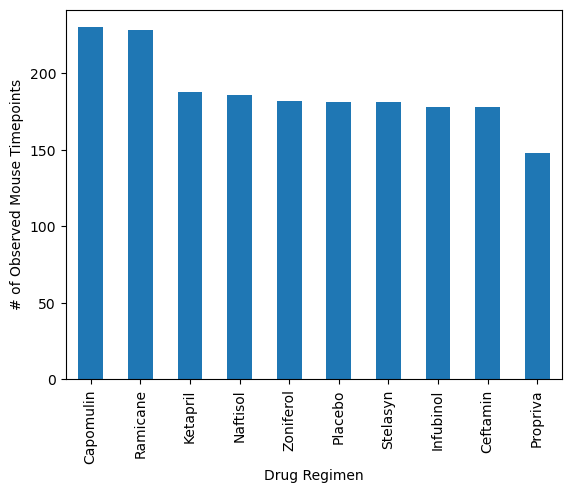

In [70]:
num_of_mice = clean_data['Drug Regimen'].value_counts()
num_of_mice
plt.ylabel('# of Observed Mouse Timepoints')
num_of_mice.plot.bar()

<Axes: ylabel='Sex'>

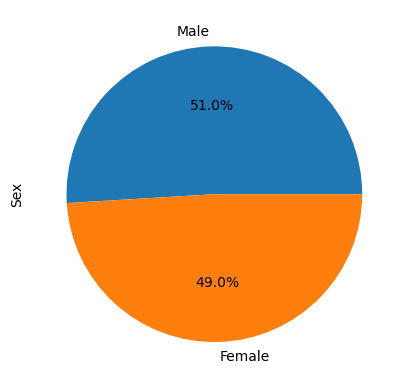

In [71]:
sex_of_mice = clean_data['Sex'].value_counts().rename('Sex')
sex_of_mice
sex_of_mice.plot.pie(autopct='%1.1f%%')

In [72]:
#make a DF looking at final timepoint for each mouse ID
lastTimepointDf = pd.DataFrame(clean_data.groupby(['Mouse ID'])['Timepoint'].max())
#merge new DF with cleaned DF to have all data for each ID's max timepoint and then display
maxMergeDf = pd.merge(clean_data, lastTimepointDf, on=('Mouse ID', 'Timepoint'), how='right')
maxMergeDf

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [73]:
#create lists for target drugs and tumor data for each drug
targetDrugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
capomulin = []
ramicane = []
infubinol = []
ceftamin = []


#loop through data and append empty lists with tumor info
for index, row in maxMergeDf.iterrows():
    
    if row['Drug Regimen'] == 'Capomulin':
            capomulin.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == 'Ramicane':
            ramicane.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == 'Infubinol':
            infubinol.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == 'Ceftamin':
            ceftamin.append(row['Tumor Volume (mm3)'])

            
#create new dataframe with target drugs info            
targetDrugsDf = pd.DataFrame({'Capomulin':capomulin, 'Ramicane':ramicane, 'Infubinol':infubinol, 'Ceftamin':ceftamin})
targetDrugsDf


,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [74]:
#calculate IQRs
capQuarts = targetDrugsDf['Capomulin'].quantile([.25,.5,.75])
capQ1 = targetDrugsDf['Capomulin'].quantile(.25)
capQ3 = targetDrugsDf['Capomulin'].quantile(.75)
capIQR = capQ3 - capQ1

ramQuarts = targetDrugsDf['Ramicane'].quantile([.25,.5,.75])
ramQ1 = targetDrugsDf['Ramicane'].quantile(.25)
ramQ3 = targetDrugsDf['Ramicane'].quantile(.75)
ramIQR = ramQ3 - ramQ1

infQuarts = targetDrugsDf['Infubinol'].quantile([.25,.5,.75])
infQ1 = targetDrugsDf['Infubinol'].quantile(.25)
infQ3 = targetDrugsDf['Infubinol'].quantile(.75)
infIQR = infQ3 - infQ1

cefQuarts = targetDrugsDf['Ceftamin'].quantile([.25,.5,.75])
cefQ1 = targetDrugsDf['Ceftamin'].quantile(.25)
cefQ3 = targetDrugsDf['Ceftamin'].quantile(.75)
cefIQR = cefQ3 - cefQ1



In [75]:
#print IQRs
print(f'Capomulin IQR = {capIQR}')
print(f'Ramicane IQR = {ramIQR}')
print(f'Infubinol IQR = {infIQR}')
print(f'Ceftamin IQR = {cefIQR}')

Capomulin IQR = 7.781863460000004
Ramicane IQR = 9.098536719999998
Infubinol IQR = 11.477135160000003
Ceftamin IQR = 15.577752179999997


<function matplotlib.pyplot.show(close=None, block=None)>

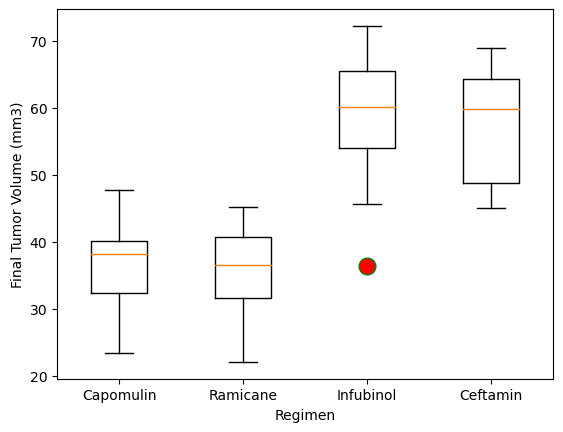

In [76]:
#define flierprops
flierprops = dict(marker='o', markerfacecolor='r', markersize=12, linestyle='none', markeredgecolor='g')
#create boxplot with desired formatting/labels
plt.boxplot(targetDrugsDf, flierprops =flierprops)

plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Regimen')
plt.xticks([1,2,3,4],targetDrugs)
#show boxplot
plt.show


In [77]:
#create DF for desired mouse for line plot
mightyMouseDF = clean_data.loc[clean_data['Mouse ID'] =='l509',:]
mightyMouseDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
371,l509,0,45.000000,0,Capomulin,Male,17,21
372,l509,5,45.851193,0,Capomulin,Male,17,21
373,l509,10,46.759074,0,Capomulin,Male,17,21
374,l509,15,47.488599,1,Capomulin,Male,17,21
375,l509,20,48.070452,2,Capomulin,Male,17,21
376,l509,25,44.006257,2,Capomulin,Male,17,21
377,l509,30,44.708055,2,Capomulin,Male,17,21
378,l509,35,40.207288,2,Capomulin,Male,17,21
379,l509,40,40.770813,2,Capomulin,Male,17,21
380,l509,45,41.483008,3,Capomulin,Male,17,21


<function matplotlib.pyplot.show(close=None, block=None)>

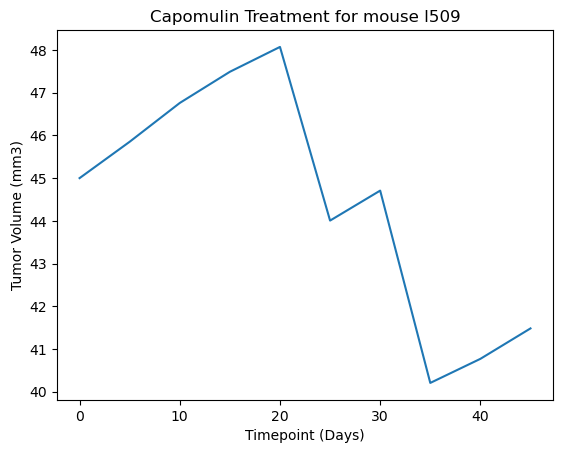

In [78]:
#create line plot 
plt.plot(mightyMouseDF['Timepoint'], mightyMouseDF['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment for mouse l509')
plt.show

In [79]:
#create a capomulin DF 
theCAP_df = clean_data.loc[clean_data['Drug Regimen'] =='Capomulin',:]
theCAP_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
10,s185,0,45.000000,0,Capomulin,Female,3,17
11,s185,5,43.878496,0,Capomulin,Female,3,17
12,s185,10,37.614948,0,Capomulin,Female,3,17
13,s185,15,38.177232,0,Capomulin,Female,3,17
14,s185,20,36.866876,0,Capomulin,Female,3,17
...,...,...,...,...,...,...,...,...
440,i557,45,47.685963,1,Capomulin,Female,1,24
1452,r157,0,45.000000,0,Capomulin,Male,22,25
1453,r157,5,45.597064,0,Capomulin,Male,22,25
1454,r157,10,46.059608,0,Capomulin,Male,22,25


In [80]:
#drop strings for computation
theCAP_nums = theCAP_df.drop(['Drug Regimen', 'Sex'], axis=1)
theCAP_nums

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
10,s185,0,45.000000,0,3,17
11,s185,5,43.878496,0,3,17
12,s185,10,37.614948,0,3,17
13,s185,15,38.177232,0,3,17
14,s185,20,36.866876,0,3,17
...,...,...,...,...,...,...
440,i557,45,47.685963,1,1,24
1452,r157,0,45.000000,0,22,25
1453,r157,5,45.597064,0,22,25
1454,r157,10,46.059608,0,22,25


In [81]:
#find averages
theCAP_df_means = theCAP_nums.groupby(['Mouse ID']).mean()

theCAP_df_means

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


<function matplotlib.pyplot.show(close=None, block=None)>

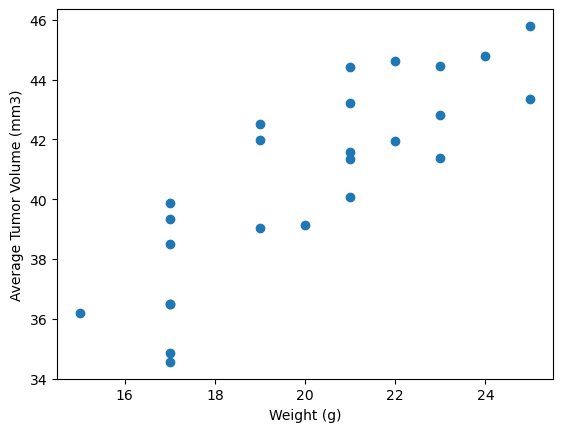

In [82]:


#plot averages


plt.scatter(theCAP_df_means['Weight (g)'], theCAP_df_means['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

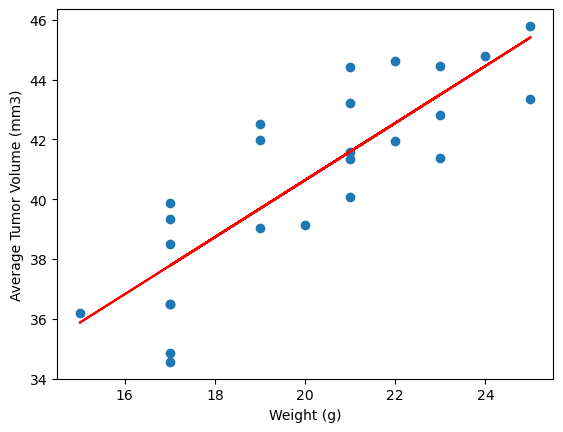

In [83]:
#set values for linear regression
x_values = theCAP_df_means['Weight (g)']
y_values = theCAP_df_means['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter with linear regression
plt.plot(x_values,regress_values,"r-")
plt.scatter(theCAP_df_means['Weight (g)'], theCAP_df_means['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show